<a href="https://colab.research.google.com/github/Hitaishree1/Hitaishree1/blob/main/Kmeans_Harsh_Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing the dataset
df=pd.read_csv('/content/Cricket (1).csv',encoding='latin1')  #iso-8859-1 western european language
df


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [ ]:
df.shape

(79, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [ ]:
#to conver the span into year of experience
#we first split the span into start and end and store in new column
df[['Strt','End']]=df.Span.str.split('-',expand=True)

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [ ]:
#convert them as int and
#find year of exp as end year-start year
#later drop span strt anad end


In [ ]:
df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17


In [ ]:
df=df.drop(['Strt','End','Span'],axis=1)

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
import re

In [ ]:
text='I scored 123 points in the game,and friend score 45 points'
match=re.search(r'(\d+)',text)

In [ ]:
match

<re.Match object; span=(9, 12), match='123'>

<ipython-input-82-4312311bf504>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='rainbow')


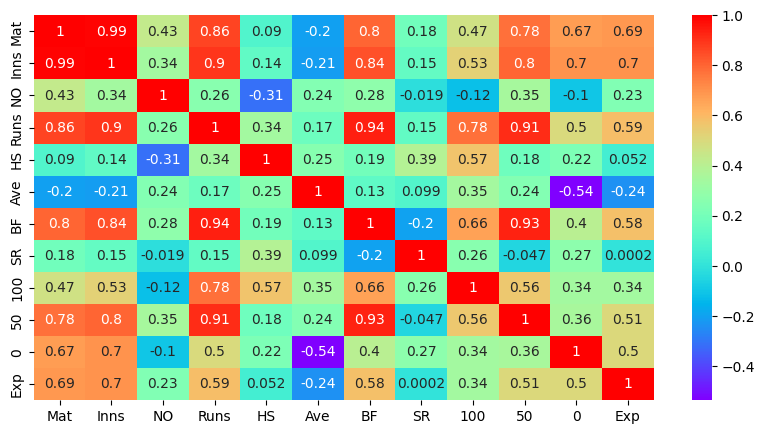

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')
plt.show()

In [ ]:
#rescale the features

In [ ]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
df_drop=df.copy()
player=df_drop.pop('Player')

In [ ]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [ ]:
player.head()

0           SR Tendulkar (INDIA)
1    KC Sangakkara (Asia/ICC/SL)
2           RT Ponting (AUS/ICC)
3        ST Jayasuriya (Asia/SL)
4     DPMD Jayawardene (Asia/SL)
Name: Player, dtype: object

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_drop)
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [ ]:
df.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'],
      dtype='object')

In [ ]:
df_df1=pd.DataFrame(df_scaled,columns=['Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [ ]:
#kmeans

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

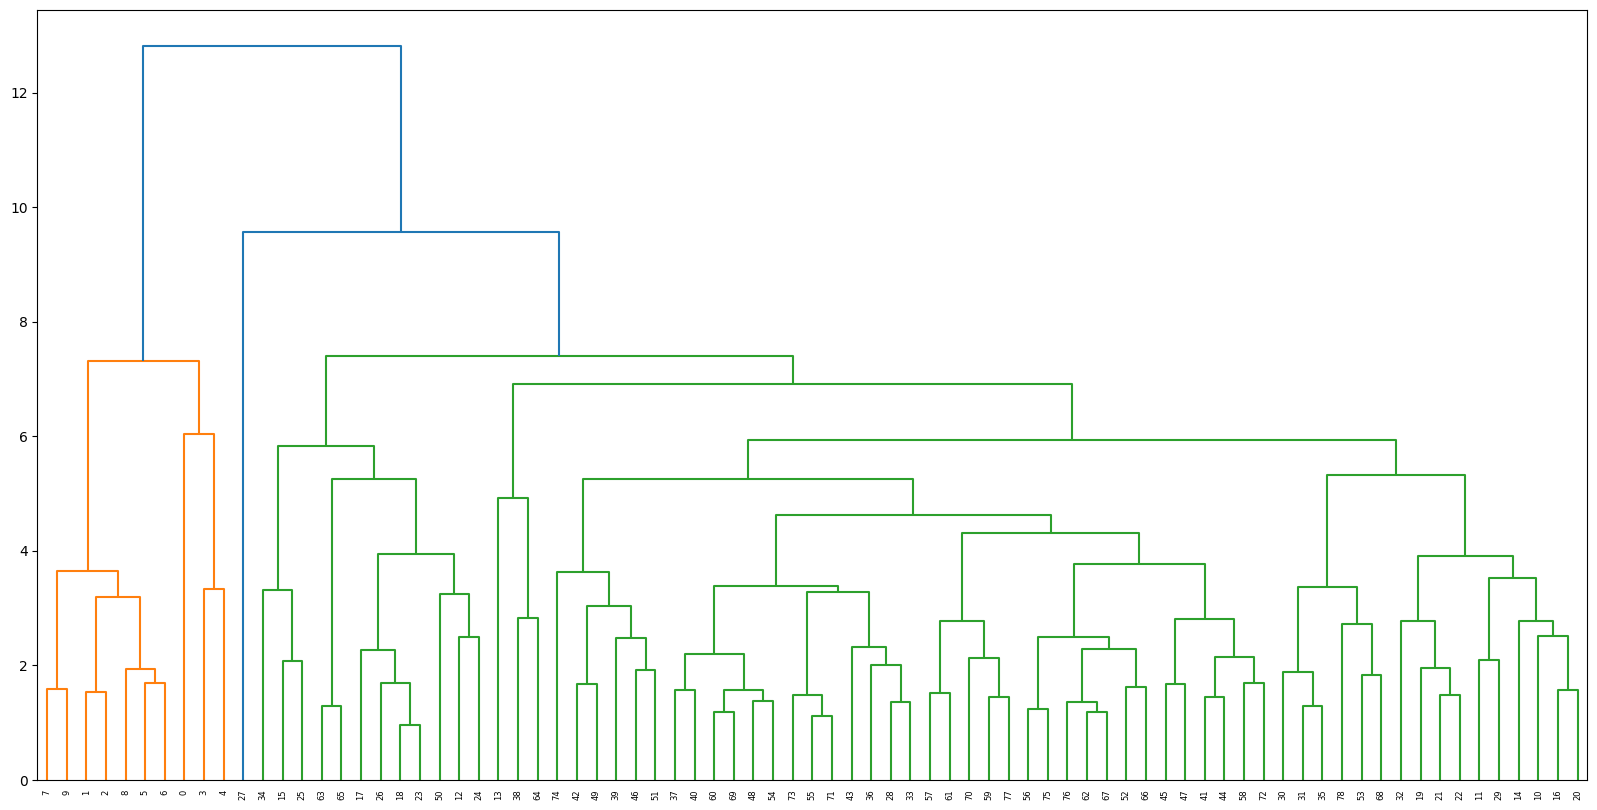

In [ ]:
#complete linkage
plt.figure(figsize=(20,10))
mergings=linkage(df_df1,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#3 cluster
cluster_label=cut_tree(mergings,n_clusters=4).reshape(-1,)
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#assign cluster label
df_hc=df.copy()
df_hc.head()
df_hc['Cluster_labels']=cluster_label
df_hc.head()


,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0


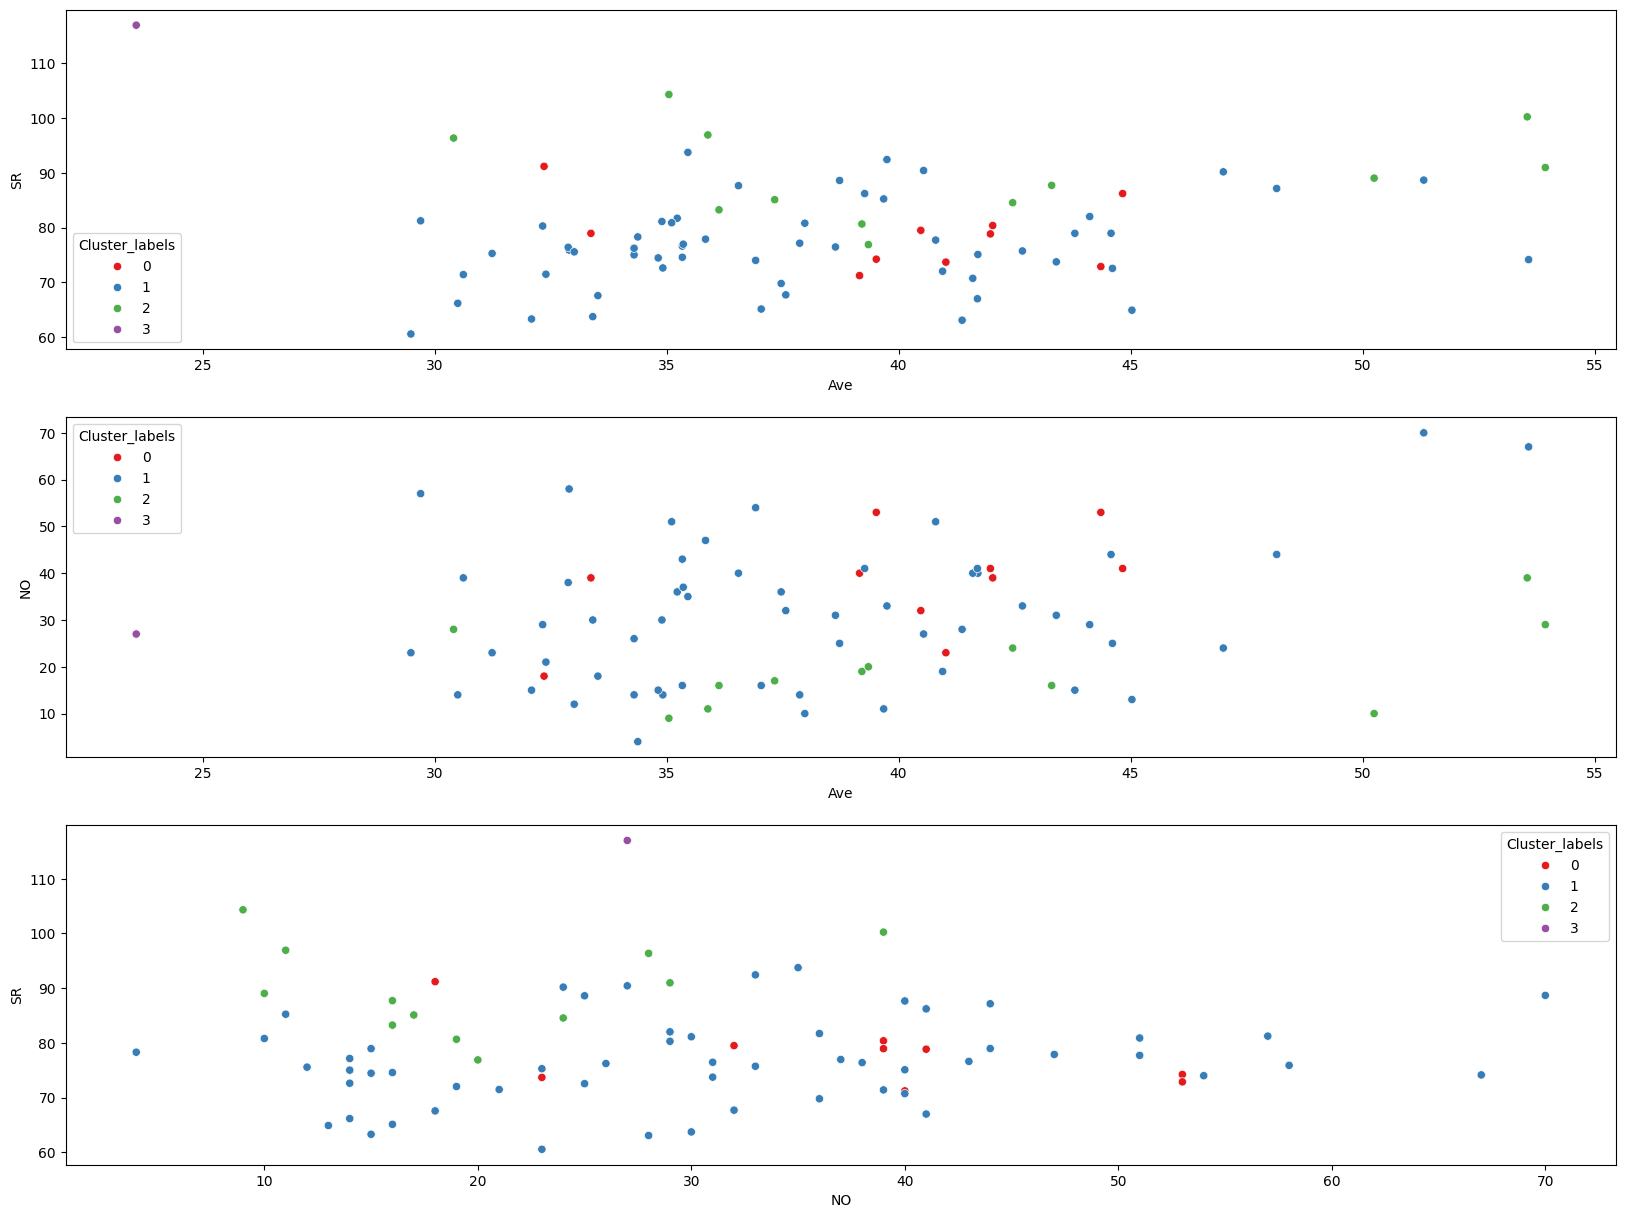

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.scatterplot(x='Ave',y='NO',hue='Cluster_labels',data=df_hc,legend='full',palette='Set1')
plt.subplot(3,1,2)
sns.scatterplot(x='Ave',y='SR',hue='Cluster_labels',data=df_hc,legend='full',palette='Set1')
plt.subplot(3,1,3)
sns.scatterplot(x='NO',y='SR',hue='Cluster_labels',data=df_hc,legend='full',palette='Set1')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]  #lst to store the within-cluster sum of square

for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(df_df1)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[948.0,
 644.829826892706,
 537.5576480125536,
 463.00018827038093,
 411.7748948147014,
 373.5268705806118,
 342.55891282460743,
 308.6928453034566,
 290.15936428436675,
 279.4342523366027]

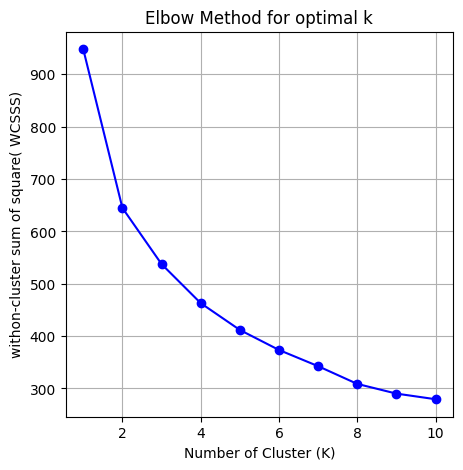

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),wcss,marker='o',linestyle='-',color='b')
plt.title('Elbow Method for optimal k')
plt.xlabel('Number of Cluster (K)')
plt.ylabel('withon-cluster sum of square( WCSSS)')
plt.grid(True)
plt.show()

In [ ]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by=['NO','Ave','SR'],ascending=[True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,0
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0


In [ ]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by=['NO','Ave','SR'],ascending=[True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
60,Tamim Iqbal (BDESH),173,171,4,5743,154,34.38,7333,78.31,9,38,16,10,1
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,1
70,G Gambhir (INDIA),147,143,11,5238,150,39.68,6144,85.25,11,34,11,10,1
54,Mohammad Hafeez (PAK),190,190,12,5876,140,33.01,7774,75.58,11,32,16,14,1
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1


In [ ]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by=['NO','Ave','SR'],ascending=[True,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,2
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,2
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,2
63,MJ Guptill (NZ),146,143,16,5500,237,43.30,6269,87.73,12,32,12,8,2
26,HH Gibbs (SA),248,240,16,8094,175,36.13,9721,83.26,21,37,22,14,2
